# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [40]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import requests as r

In [3]:
spark = SparkSession.builder.master("local[1]").appName("scores").getOrCreate()

23/01/02 17:19:26 WARN Utils: Your hostname, xkeyscore resolves to a loopback address: 127.0.1.1; using 192.168.1.10 instead (on interface wlp0s20f3)
23/01/02 17:19:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/02 17:19:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/01/02 17:19:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

In [5]:
URL = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv"
request = r.get(URL)

### Step 3. Assign it to a variable called tips

In [11]:
tips = spark.read.csv("tips.csv", inferSchema=True, header=True)

In [12]:
tips.show()

23/01/02 17:21:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , total_bill, tip, sex, smoker, day, time, size
 Schema: _c0, total_bill, tip, sex, smoker, day, time, size
Expected: _c0 but found: 
CSV file: file:///home/chiragsehra/Documents/pyspark_exercises/07_Visualization/Tips/tips.csv
+---+----------+----+------+------+---+------+----+
|_c0|total_bill| tip|   sex|smoker|day|  time|size|
+---+----------+----+------+------+---+------+----+
|  0|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|  1|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|  2|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|  3|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|  4|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|  5|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|  6|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|  7|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|  8|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|  9|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
| 1

### Step 4. Delete the Unnamed 0 column

In [14]:
tips = tips.drop('_c0')

In [16]:
tips.show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



### Step 5. Plot the total_bill column histogram

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

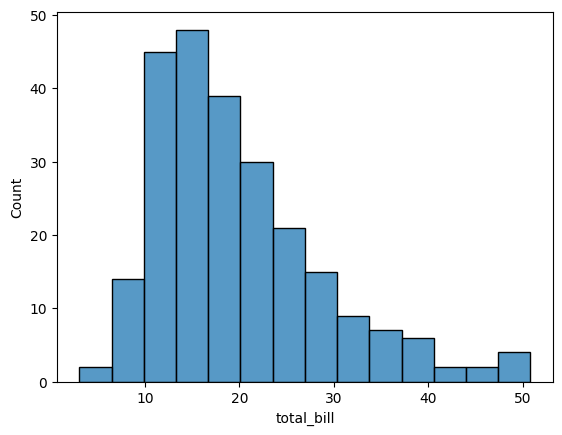

In [20]:
sns.histplot(data=tips.toPandas(),x=tips.toPandas()['total_bill'])

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

In [21]:
tips_pd = tips.toPandas()

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

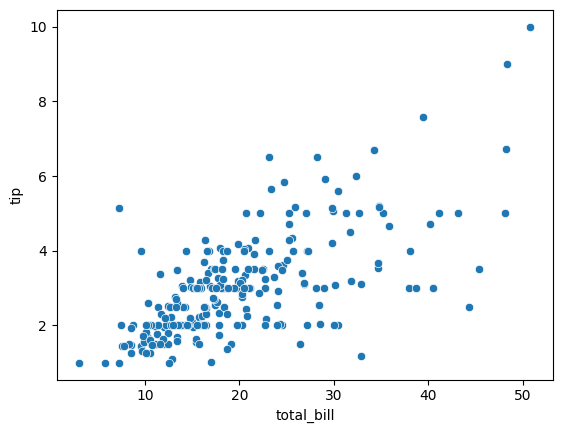

In [22]:
sns.scatterplot(x=tips_pd['total_bill'], y=tips_pd['tip'])

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

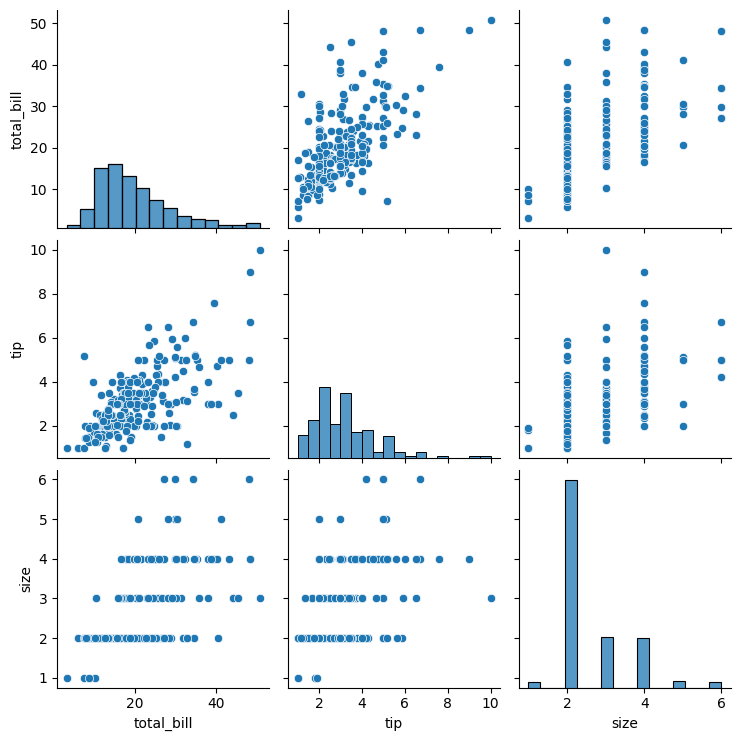

In [25]:
sns.pairplot(tips_pd)

### Step 8. Present the relationship between days and total_bill value

<AxesSubplot: xlabel='day', ylabel='total_bill'>

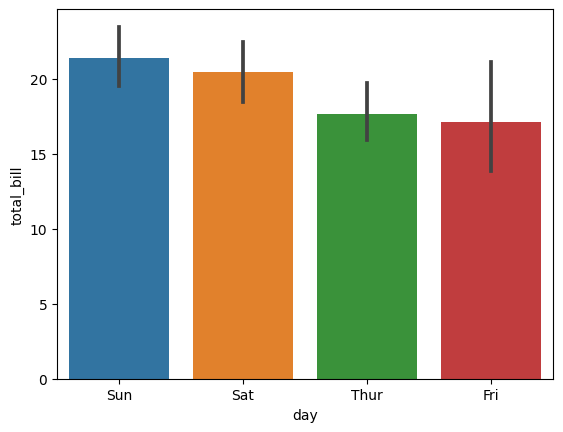

In [29]:
sns.barplot(x=tips_pd['day'],y=tips_pd['total_bill'])

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

<AxesSubplot: xlabel='tip', ylabel='day'>

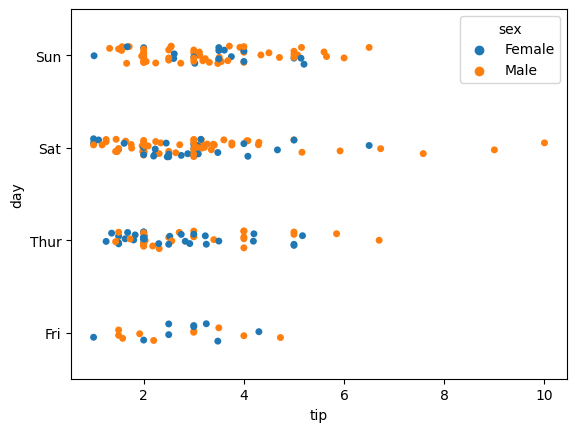

In [34]:
sns.stripplot(x=tips_pd['tip'],y=tips_pd['day'], hue=tips_pd['sex'])

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

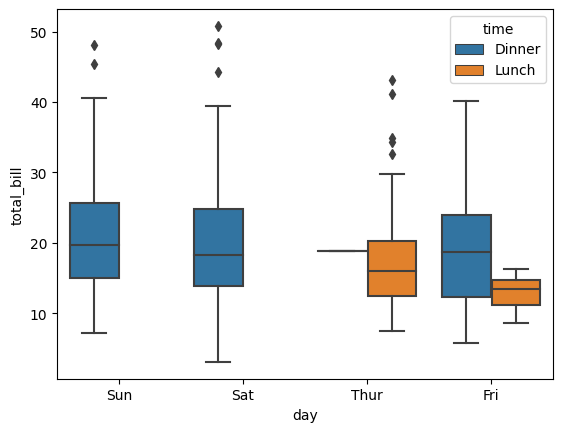

In [36]:
sns.boxplot(x=tips_pd['day'], y=tips_pd['total_bill'], hue=tips_pd['time'])

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

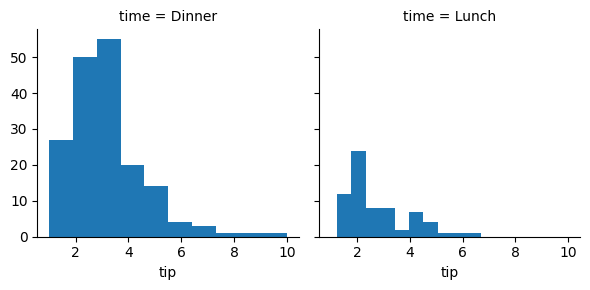

In [42]:
g = sns.FacetGrid(tips_pd,col='time')
g.map(plt.hist,'tip')

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

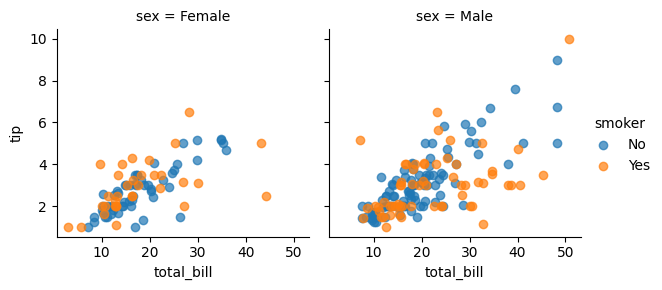

In [43]:
g = sns.FacetGrid(tips_pd, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();

### BONUS: Create your own question and answer it using a graph.